In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import StackingClassifier

In [2]:
sampleFile = open('feature_df','rb')
feature_df = pickle.load(sampleFile)
sampleFile.close()

In [3]:
feature_df.head()

,target,age_bins,bp_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr,multivariate_pdf,log_multivariate_pdf,log_multi_pdf_bin
179,1,3,2,1,0,0,1,1,0.832909,1,4.927254,1,0,0,1,1,0.869565,2.841434e-07,-15.073787,0
270,0,1,1,0,0,0,0,0,0.095310,0,4.875197,0,1,1,0,0,0.000000,1.118427e-06,-13.703588,0
323,0,2,1,0,0,0,0,0,0.095310,0,4.890349,0,1,1,0,0,0.000000,7.989242e-07,-14.040000,0
399,0,2,1,0,0,0,0,0,0.095310,0,4.905275,0,1,1,0,0,0.000000,1.935588e-07,-15.457684,0
40,1,2,2,1,0,0,1,1,0.741937,1,4.927254,1,0,0,1,1,0.952381,4.869705e-08,-16.837647,1


In [4]:
feature_df['bp_bins'].value_counts()

1    154
0     52
2     29
3     19
4      2
Name: bp_bins, dtype: int64

In [5]:
def convertIntoNum(x):
    if x == 'low':
        return 0
    elif x == 'vlow':
        return 1
    elif x == 'med':
        return 2
    elif x == 'medH':
        return 3
    else:
        return 4
    
feature_df['bp_bins'] = feature_df['bp_bins'].apply(lambda x : convertIntoNum(x))
feature_df.head()

,target,age_bins,bp_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr,multivariate_pdf,log_multivariate_pdf,log_multi_pdf_bin
179,1,3,4,1,0,0,1,1,0.832909,1,4.927254,1,0,0,1,1,0.869565,2.841434e-07,-15.073787,0
270,0,1,4,0,0,0,0,0,0.095310,0,4.875197,0,1,1,0,0,0.000000,1.118427e-06,-13.703588,0
323,0,2,4,0,0,0,0,0,0.095310,0,4.890349,0,1,1,0,0,0.000000,7.989242e-07,-14.040000,0
399,0,2,4,0,0,0,0,0,0.095310,0,4.905275,0,1,1,0,0,0.000000,1.935588e-07,-15.457684,0
40,1,2,4,1,0,0,1,1,0.741937,1,4.927254,1,0,0,1,1,0.952381,4.869705e-08,-16.837647,1


## 1.1 Principal Component Analysis on developed feature set

Let's apply PCA to visualize if there is any seperation in data points that we can observe in lower dimension.<br>
We will apply PCA on standardized data.<br>
So Let's first convert the above feature dataframe into standardized dataframe.<br>
We can then apply PCA and see how can we observe variance in data.<br>

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_feature = scaler.fit_transform(feature_df.drop(['target'],axis=1))

In [7]:
std_feature

array([[ 1.11072551,  0.        ,  0.68599434, ..., -0.13810709,
         0.64361561, -1.09858844],
       [-1.2010284 ,  0.        , -0.68599434, ...,  0.74887759,
         1.07492595, -1.09858844],
       [-0.04515144,  0.        , -0.68599434, ...,  0.40919217,
         0.96903033, -1.09858844],
       ...,
       [-1.2010284 ,  0.        , -0.68599434, ..., -0.36186947,
         0.21872661,  0.91025899],
       [-0.04515144,  0.        , -0.68599434, ...,  2.67071626,
         1.37766166, -1.09858844],
       [-1.2010284 ,  0.        , -0.68599434, ..., -0.43800922,
        -0.90717414,  0.91025899]])

In [8]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [9]:
pca = PCA().fit(std_feature)
summary = pca_summary(pca,std_feature)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.671492e+00,3.964926e-01,0.396493
PC2,1.337133e+00,9.932910e-02,0.495822
PC3,1.325460e+00,9.760244e-02,0.593424
PC4,1.114933e+00,6.905981e-02,0.662484
PC5,1.062720e+00,6.274301e-02,0.725227
PC6,9.740275e-01,5.270720e-02,0.777934
PC7,8.767050e-01,4.270065e-02,0.820635
PC8,7.835085e-01,3.410475e-02,0.854740
PC9,7.321039e-01,2.977645e-02,0.884516


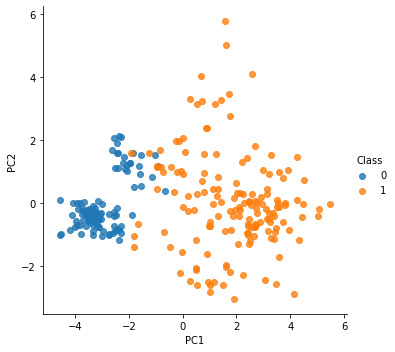

In [10]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, std_feature, feature_df['target'])

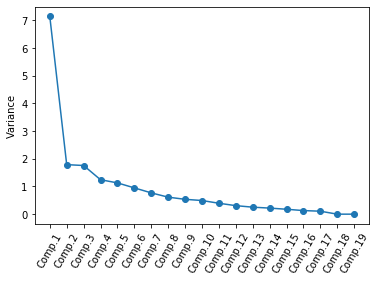

In [11]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
screeplot(pca, std_feature)

Here we can observe an elbow at second component.<br>
Maximum Variance is explained by this two principal components.<br>
While the overall variance explained by them is comparatively less but the seperation of data points observed is amazing.

## 1.2 PCA on original dataset with numeric features
* Let's try it with our original dataset with only numeric features

In [12]:
sampleFile = open('X_train_df','rb')
X_train_df = pickle.load(sampleFile)
sampleFile.close()

In [13]:
## Selecting only numeric columns from the dataset
numeric_df = X_train_df.select_dtypes(include = ['int64','float64'])
x_numeric = numeric_df.drop(['target'],axis = 1)
y_numeric = numeric_df['target']

In [14]:
scaler = StandardScaler()
x_numeric_std = scaler.fit_transform(x_numeric)

In [15]:
pca = PCA().fit(x_numeric_std)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.234575,0.332888,0.332888
PC2,1.358138,0.122969,0.455858
PC3,1.135641,0.085979,0.541836
PC4,1.093360,0.079696,0.621532
PC5,0.986604,0.064892,0.686425
PC6,0.925164,0.057062,0.743487
PC7,0.905120,0.054616,0.798103
PC8,0.863696,0.049731,0.847834
PC9,0.712864,0.033878,0.881712


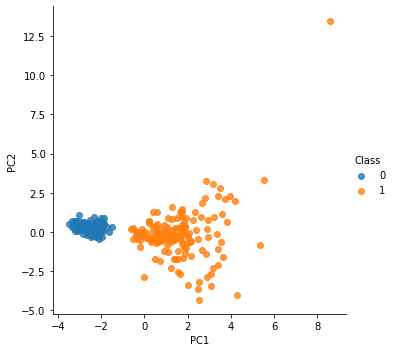

In [16]:
summary = pca_summary(pca,x_numeric_std)
pca_scatter(pca, x_numeric_std, y_numeric)

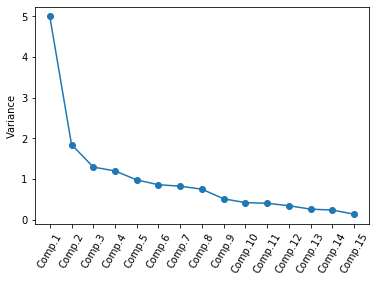

In [17]:
screeplot(pca, x_numeric_std)

Above Scatter plot with such high seperation with two principal components makes me curious to build a simple Logistic Regression model and see how well it performs for the cross validation data. <br>
So here is the process we'll follow :<br>
* Take the cross validation data and standardize it using the scaler used for training data.
* Use the standardized data,apply PCA(use the pca object used for training data) and use the first two components obtained from it.
* Use this as the cross validation data.
* Train the LR model using PCA components from train data.
* Check the performance of the model using PCA from Cross validation data.

In [18]:
sampleFile = open('X_cv','rb')
X_cv = pickle.load(sampleFile)
sampleFile.close()

sampleFile = open('y_cv','rb')
y_cv = pickle.load(sampleFile)
sampleFile.close()

In [19]:
num_y_cv = y_cv.apply(lambda x : 1 if x == 'ckd' else 0)

In [20]:
num_x_cv = X_cv.select_dtypes(include=['int64','float64'])

In [21]:
# Using the scaler used for training data to build standardized cross-validation data
std_x_cv = scaler.transform(num_x_cv)

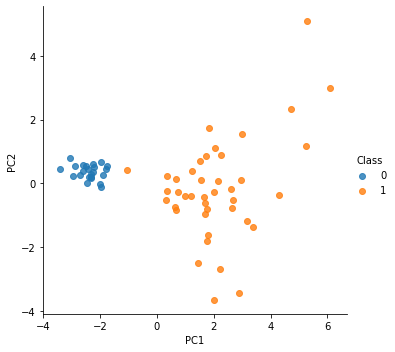

In [22]:
pca_scatter(pca,std_x_cv,num_y_cv)

Even for cross-validation data we see similar results.<br>
It is very much evident that a simple linear classifier will do the job of classification very well.<br>
So let's build a model and see how good is the accuracy that we get.

Fetching 2 principal components

In [23]:
def getComponents(pca,std_data,n = 2):
    pca_data = pca.transform(std_data)
    pca_df = pd.DataFrame(pca_data)
    return pca_df[[i for i in range(0,2)]]

In [24]:
pca_x_train = getComponents(pca,x_numeric_std)
pca_x_cv = getComponents(pca,std_x_cv)

## Building a simple Logistic Regression model

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(pca_x_train, y_numeric)
clf.predict(pca_x_cv)
clf.predict_proba(pca_x_cv)
print("Accuracy using cross validation data : ",clf.score(pca_x_cv,num_y_cv) * 100)

Accuracy using cross validation data :  98.4375


And Voila! we are seeing what is expected.<br>
98% accuracy on cross-validation data.

In [26]:
feature_df.columns

Index(['target', 'age_bins', 'bp_bins', 'al_cat', 'su_bin', 'bgr_bin',
       'bu_bin', 'sc_bin', 'log_norm_sc', 'sod_bin', 'log_norm_sod',
       'norm_sod_bin', 'hemo_bin', 'rc_bin', 'wc_bin', 'sc_bu_bin', 'acr',
       'multivariate_pdf', 'log_multivariate_pdf', 'log_multi_pdf_bin'],
      dtype='object')

In [27]:
feature_df.shape

(256, 20)

## Transforming the Input data to build the feature set for testing and cross-validation

In [28]:
## Let's write a function to perform all the required transformations for the cross validation data
def formBins(x,lst):
  if x <= lst[0]:
    return 0
  elif x > lst[0] and x <= lst[1]: 
    return 1
  elif x > lst[1] and x <= lst[2]: 
    return 2
  elif x > lst[2]:
    return 3

def formAlBins(x):
  if x == 0:
    return 0
  elif x >=1 and x <=2:
    return 1
  else:
    return 2


def reflector(x):
  median_sod = np.median(X_train_df['sod'])
  if x < median_sod:
    dev = median_sod-x
    return median_sod + dev
  elif x > median_sod:
    dev = x - median_sod
    return median_sod - dev
  else:
    return x

def sc_bu_bin(x):
    if x['sc'] <= 1.4 and x['bu'] <= 50:
        return 0
    else:
        return 1


In [29]:
np.median(X_train_df['sod'])

138.0

In [30]:
def transformCvAndTest(test_df):
    
    """
    Columns to be generated
        'target', 'age_bins', 'bp_bins', 'al_cat', 'su_bin', 'bgr_bin',
       'bu_bin', 'sc_bin', 'log_norm_sc', 'sod_bin', 'log_norm_sod',
       'norm_sod_bin', 'hemo_bin', 'rc_bin', 'wc_bin', 'sc_bu_bin', 'acr',
       'multivariate_pdf', 'log_multivariate_pdf', 'log_multi_pdf_bin
    """
    
    trans_df = pd.DataFrame()
    trans_df['target'] = test_df['target']
    trans_df['age_bins'] = test_df['age'].apply(lambda x : formBins(x,[20,40,60]))
    trans_df['bp_bins'] = test_df['bp'].apply(lambda x : formBins(x,[60,80,90]))
    trans_df['al_cat'] = test_df['al'].apply(lambda x : formAlBins(x))
    trans_df['su_bin'] = test_df['su'].apply(lambda x : 0 if x==0 else 1)
    trans_df['bgr_bin'] = test_df['bgr'].apply(lambda x : 0 if x <= 140 else 1)
    trans_df['bu_bin'] = test_df['bu'].apply(lambda x : 0 if x <= 50 else 1)
    trans_df['sc_bin'] = test_df['sc'].apply(lambda x : 0 if x <= 1.2 else 1)
    trans_df['log_norm_sc'] = np.log(test_df['sc'])
    trans_df['sod_bin'] = test_df['sod'].apply(lambda x : 1 if x <= 138 else 0)
    
    reflected_sod = test_df['sod'].apply(lambda x : reflector(x))
    log_norm_sod = np.log(reflected_sod)
    trans_df['log_norm_sod'] = log_norm_sod
    
    trans_df['norm_sod_bin'] = trans_df['log_norm_sod'].apply(lambda x : 0 if x <= 4.92 else 1)
    trans_df['hemo_bin'] = test_df['hemo'].apply(lambda x : 0 if x <= 12.65 else 1)
    trans_df['rc_bin'] = test_df['rc'].apply(lambda x : 0 if x <= 4.4 else 1)
    trans_df['wc_bin'] = test_df['wc'].apply(lambda x : 0 if x <=8600 else 1)
    trans_df['sc_bu_bin'] = test_df.apply(lambda x : sc_bu_bin(x),axis = 1)
    
    trans_df['acr'] = test_df['al']/test_df['sc']
    return trans_df

In [31]:
cv_df= pd.concat([X_cv,y_cv],axis=1)

In [32]:
cv_df['target'] = cv_df['classification'].apply(lambda x : 1 if x == 'ckd' else 0)

In [33]:
trans_cv_df = transformCvAndTest(cv_df)

In [34]:
trans_cv_df.head()

,target,age_bins,bp_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr
107,1,2,3,1,1,1,1,1,1.029619,0,4.919981,0,0,0,1,1,0.357143
14,1,3,1,2,1,1,1,1,1.410987,1,4.983607,1,0,0,1,1,0.731707
7,1,1,1,1,1,1,0,0,0.095310,1,4.927254,1,0,1,0,0,1.818182
155,1,2,1,2,0,0,0,1,0.587787,1,4.927254,1,0,0,0,1,1.666667
90,1,3,3,1,1,1,0,1,1.163151,0,4.890349,0,1,0,1,1,0.625000


In [35]:
trans_train_df = pd.DataFrame()
for col in trans_cv_df.columns:
    trans_train_df[col] = feature_df[col]
    
print("CV Data shape : ",trans_cv_df.shape)
print("Train Data shape : ",trans_train_df.shape)

CV Data shape :  (64, 17)
Train Data shape :  (256, 17)


## Building a Decision Tree with no hyper-parameter tuning

In [36]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

train_x = trans_train_df.drop(['target'],axis=1)
train_y = trans_train_df['target']

cv_x = trans_cv_df.drop(['target'],axis=1)
cv_y = trans_cv_df['target']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

cv_pred = clf.predict(cv_x)
cv_pred_prob = clf.predict_proba(cv_x)

train_pred = clf.predict(train_x)
train_pred_prob = clf.predict_proba(train_x)

In [37]:
# For CV Data
cv_auc_score = roc_auc_score(cv_y,cv_pred_prob[:,1])
cv_lloss = log_loss(cv_y,cv_pred_prob[:,1])

# For Train Data
train_auc_score = roc_auc_score(train_y,train_pred_prob[:,1])
train_lloss = log_loss(train_y,train_pred_prob[:,1])

In [38]:
print("*" * 20,"Cv Data","*" * 20)
print("AUC Score : ",cv_auc_score)
print("Log Loss : ",cv_lloss)

print("*" * 20,"Train Data","*" * 20)
print("AUC Score : ",train_auc_score)
print("Log Loss : ",train_lloss)

******************** Cv Data ********************
AUC Score :  1.0
Log Loss :  9.992007221626415e-16
******************** Train Data ********************
AUC Score :  1.0
Log Loss :  9.992007221626413e-16


In [39]:
from sklearn.metrics import roc_curve,auc
n_classes = 2
fpr,tpr,threshold= roc_curve(cv_y,cv_pred_prob[:, 1])
roc_auc = auc(fpr,tpr)

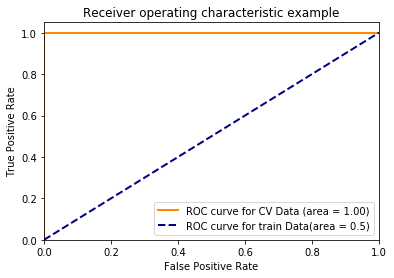

In [40]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve for CV Data (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', label='ROC curve for train Data(area = 0.5)',lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

This is performing really well even for cross validation data.
## Let's Build a Logistic Regression model
* Standardize the features
* Build the model using L1 & L2-regularization with Grid Search CV
* Come up with optimal parameters for hyperparameters
* Read the model weights and get feature importances

In [41]:
train_x.drop('bp_bins',axis = 1,inplace=True)
cv_x.drop('bp_bins',axis = 1,inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_train_x = scaler.fit_transform(train_x)
std_cv_x = scaler.transform(cv_x)

std_train_df = pd.DataFrame(std_train_x,columns = train_x.columns)
std_cv_df = pd.DataFrame(std_cv_x,columns = cv_x.columns)

In [43]:
std_train_df.head()

,age_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr
0,1.110726,0.685994,-0.391348,-0.60744,1.524689,0.954174,0.422627,0.813841,-0.002583,0.813841,-0.903107,-0.946729,0.868000,1.142938,0.640168
1,-1.201028,-0.685994,-0.391348,-0.60744,-0.655872,-1.048027,-0.454301,-1.228741,-0.854656,-1.228741,1.107288,1.056268,-1.152073,-0.874938,-0.525719
2,-0.045151,-0.685994,-0.391348,-0.60744,-0.655872,-1.048027,-0.454301,-1.228741,-0.606647,-1.228741,1.107288,1.056268,-1.152073,-0.874938,-0.525719
3,-0.045151,-0.685994,-0.391348,-0.60744,-0.655872,-1.048027,-0.454301,-1.228741,-0.362340,-1.228741,1.107288,1.056268,-1.152073,-0.874938,-0.525719
4,-0.045151,0.685994,-0.391348,-0.60744,1.524689,0.954174,0.314471,0.813841,-0.002583,0.813841,-0.903107,-0.946729,0.868000,1.142938,0.751205


In [44]:
## Hyper-parameter values
## Let's try elastic-net regularization
## with hyper-parameter used for it as l1-ratio
l1_ratio_param = [i for i in np.linspace(0,1,10)]
print(l1_ratio_param)

[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]


In [45]:
cv_auc_score_dict = {}
cv_log_loss_dict = {}

train_auc_score_dict = {}
train_log_loss_dict = {}

for param in l1_ratio_param:
    clf = LogisticRegression(solver = 'saga',penalty = 'elasticnet',l1_ratio = param)
    clf.fit(std_train_df,train_y)
    
    cv_pred = clf.predict(std_cv_df)
    cv_pred_prob = clf.predict_proba(std_cv_df)
    
    train_pred = clf.predict(std_train_df)
    train_pred_prob = clf.predict_proba(std_train_df)
    
    cv_auc_score = roc_auc_score(cv_y,cv_pred_prob[:,1])
    cv_lloss = log_loss(cv_y,cv_pred_prob[:,1])
    
    train_auc_score = roc_auc_score(train_y,train_pred_prob[:,1])
    train_lloss = log_loss(train_y,train_pred_prob[:,1])
    
    cv_auc_score_dict[str(param)] = cv_auc_score
    cv_log_loss_dict[str(param)] = cv_lloss
    
    train_auc_score_dict[str(param)] = train_auc_score
    train_log_loss_dict[str(param)] = train_lloss

C:\Users\capiot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\capiot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\capiot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\capiot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\capiot\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

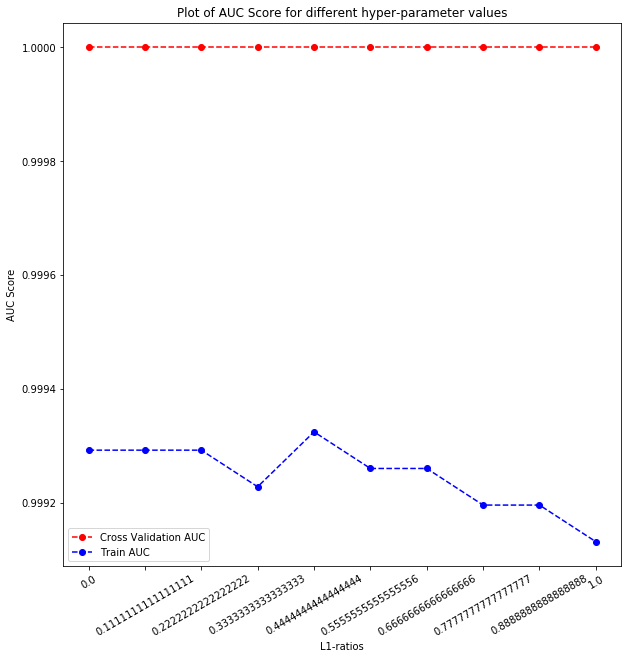

In [46]:
y_cv_auc = list(cv_auc_score_dict.values())
y_train_auc = list(train_auc_score_dict.values())
xi = [i for i in range(10)]

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(l1_ratio_param, y_cv_auc, marker='o', linestyle='--', color='r',label='Cross Validation AUC')
plt.plot(l1_ratio_param, y_train_auc,marker ='o',linestyle='--',color='b',label='Train AUC')

plt.xlabel('L1-ratios')
plt.ylabel('AUC Score')
plt.xticks(l1_ratio_param,l1_ratio_param,rotation=30)
plt.title('Plot of AUC Score for different hyper-parameter values')
plt.legend()
plt.show()

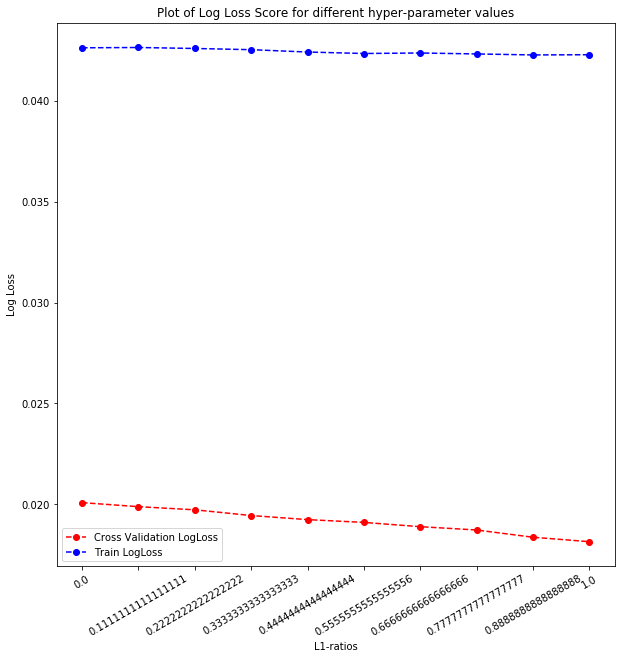

In [47]:
y_cv_ll = list(cv_log_loss_dict.values())
y_train_ll = list(train_log_loss_dict.values())

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(l1_ratio_param, y_cv_ll, marker='o', linestyle='--', color='r',label='Cross Validation LogLoss')
plt.plot(l1_ratio_param, y_train_ll,marker ='o',linestyle='--',color='b',label='Train LogLoss')

plt.xlabel('L1-ratios')
plt.ylabel('Log Loss')
plt.xticks(l1_ratio_param,l1_ratio_param,rotation=30)
plt.title('Plot of Log Loss Score for different hyper-parameter values')
plt.legend()
plt.show()

Let's select the l1-ratio to 1.0.<br>
After which we will check for weights of plane.

In [48]:
clf = LogisticRegression(solver = 'saga',penalty = 'elasticnet',l1_ratio = 1.0,max_iter = 1000)
clf.fit(std_train_df,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1.0, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Let's check for multicollinearity in dataset

### By VIF factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(std_train_df.values, i) for i in range(std_train_df.shape[1])]
vif["features"] = std_train_df.columns

C:\Users\capiot\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
vif

,VIF Factor,features
0,1.303464,age_bins
1,4.363195,al_cat
2,1.717832,su_bin
3,2.000345,bgr_bin
4,2.915930,bu_bin
5,4.132757,sc_bin
6,4.255567,log_norm_sc
7,inf,sod_bin
8,1.895238,log_norm_sod
9,inf,norm_sod_bin


### By adding small random noise to the dataset and checking for weights(Perturbation Test)

In [51]:
random_noise = 0.5
std_train_pert_df = pd.DataFrame()
std_train_pert_df = std_train_df

std_train_pert_df = std_train_pert_df + random_noise
std_train_df.head(2)

,age_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr
0,1.110726,0.685994,-0.391348,-0.60744,1.524689,0.954174,0.422627,0.813841,-0.002583,0.813841,-0.903107,-0.946729,0.868000,1.142938,0.640168
1,-1.201028,-0.685994,-0.391348,-0.60744,-0.655872,-1.048027,-0.454301,-1.228741,-0.854656,-1.228741,1.107288,1.056268,-1.152073,-0.874938,-0.525719


In [52]:
std_train_pert_df.head(2)

,age_bins,al_cat,su_bin,bgr_bin,bu_bin,sc_bin,log_norm_sc,sod_bin,log_norm_sod,norm_sod_bin,hemo_bin,rc_bin,wc_bin,sc_bu_bin,acr
0,1.610726,1.185994,0.108652,-0.10744,2.024689,1.454174,0.922627,1.313841,0.497417,1.313841,-0.403107,-0.446729,1.368000,1.642938,1.140168
1,-0.701028,-0.185994,0.108652,-0.10744,-0.155872,-0.548027,0.045699,-0.728741,-0.354656,-0.728741,1.607288,1.556268,-0.652073,-0.374938,-0.025719


In [53]:
pert_clf = LogisticRegression(solver = 'saga',penalty = 'elasticnet',l1_ratio = 1.0,max_iter = 1000)
pert_clf.fit(std_train_pert_df,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1.0, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Creating a dataframe of feature columns and their corresponding weights

In [54]:
feat_imp_df = pd.DataFrame({'feat_imp' : clf.coef_[0],'cols' : std_train_df.columns})
feat_imp_pert_df = pd.DataFrame({'feat_imp' : pert_clf.coef_[0],'cols' : std_train_df.columns})

In [55]:
feat_imp_df

,feat_imp,cols
0,0.000000,age_bins
1,0.000000,al_cat
2,0.000000,su_bin
3,2.437590,bgr_bin
4,0.000000,bu_bin
5,0.563409,sc_bin
6,0.925688,log_norm_sc
7,0.208134,sod_bin
8,0.000000,log_norm_sod
9,0.208134,norm_sod_bin


In [56]:
feat_imp_pert_df

,feat_imp,cols
0,0.000000,age_bins
1,0.000000,al_cat
2,0.000000,su_bin
3,2.427610,bgr_bin
4,0.000000,bu_bin
5,0.555967,sc_bin
6,0.894187,log_norm_sc
7,0.216784,sod_bin
8,0.000000,log_norm_sod
9,0.216784,norm_sod_bin


if you compare the feature importances it can be observed that with small change in data the weights don't change much.<br>
Which suggests that there is very less multicollinearity between features.<br>
Also it can be seen that a lot of features are showing a weight 0 which suggests that they are not the important ones and their coefficients have been brought to 0 by L1-regularization.
## Let's save our model for further use

In [57]:
import pickle
sampleFile = open('regressor','wb')
pickle.dump(clf,sampleFile)
sampleFile.close()

In [58]:
sampleFile = open('scaler','wb')
pickle.dump(scaler,sampleFile)
sampleFile.close()

In [59]:
features = [10,10,10,10]
np.array(features).reshape([-1,4])

array([[10, 10, 10, 10]])

In [60]:
sampleFile = open('X_test','rb')
x_test = pickle.load(sampleFile)
sampleFile.close()

sampleFile = open('y_test','rb')
y_test = pickle.load(sampleFile)
sampleFile.close()

In [61]:
test_df = pd.DataFrame()
test_df = pd.concat([x_test,y_test],axis = 1)
test_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
209,209,19.0,70.0,1.020,0.0,0.0,1,0.0,notpresent,notpresent,...,33,6900,3.9,no,no,no,good,no,no,ckd
280,280,47.0,80.0,1.020,0.0,0.0,0,1.0,notpresent,notpresent,...,52,8100,5.2,no,no,no,good,no,no,notckd
33,33,60.0,100.0,1.020,2.0,0.0,1,1.0,notpresent,notpresent,...,29,8900,3.9,yes,no,no,poor,no,no,ckd
210,210,59.0,100.0,1.015,4.0,2.0,0,0.0,notpresent,notpresent,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
93,93,73.0,100.0,1.010,3.0,2.0,1,1.0,present,notpresent,...,30,7000,3.2,yes,yes,yes,poor,no,no,ckd


In [62]:
test_df.loc[280]

id                       280
age                       47
bp                        80
sg                      1.02
al                         0
su                         0
rbc                        0
pc                         1
pcc               notpresent
ba                notpresent
bgr                       93
bu                        33
sc                       0.9
sod                      144
pot                      4.5
hemo                    13.3
pcv                       52
wc                      8100
rc                       5.2
htn                       no
dm                        no
cad                       no
appet                   good
pe                        no
ane                       no
classification        notckd
Name: 280, dtype: object

## Models to try 
* KNN
* RBF Kernel 
* Decision Tree 
* Random Forest
* XGBoost

## Variable name for train and Cv data
* Train Data : std_train_df,train_y
* CV Data : std_cv_df,cv_y

## K-Nearest Neighbor Implementation

In [63]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [i for i in range(1,23,2)]
print("Hyper-parameters : ",neighbors)

cv_auc_score_dict = {}
cv_log_loss_dict = {}

train_auc_score_dict = {}
train_log_loss_dict = {}

for n in neighbors:
    
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(std_train_df,train_y)
    
    cv_pred = neigh.predict(std_cv_df)
    cv_pred_prob = neigh.predict_proba(std_cv_df)
    
    train_pred = neigh.predict(std_train_df)
    train_pred_prob = neigh.predict_proba(std_train_df)
    
    cv_auc_score = roc_auc_score(cv_y,cv_pred_prob[:,1])
    cv_lloss = log_loss(cv_y,cv_pred_prob[:,1])
    
    train_auc_score = roc_auc_score(train_y,train_pred_prob[:,1])
    train_lloss = log_loss(train_y,train_pred_prob[:,1])
    
    cv_auc_score_dict[str(n)] = cv_auc_score
    cv_log_loss_dict[str(n)] = cv_lloss
    
    train_auc_score_dict[str(n)] = train_auc_score
    train_log_loss_dict[str(n)] = train_lloss
    

Hyper-parameters :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


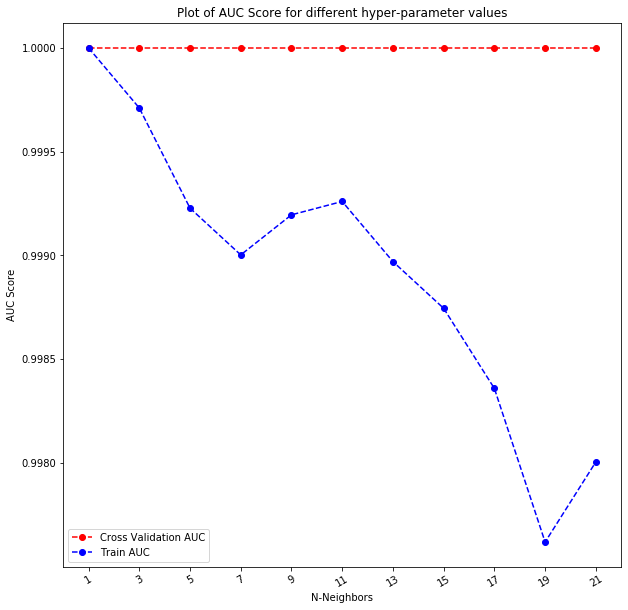

In [64]:
y_cv_auc = list(cv_auc_score_dict.values())
y_train_auc = list(train_auc_score_dict.values())
xi = [i for i in range(10)]

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(neighbors, y_cv_auc, marker='o', linestyle='--', color='r',label='Cross Validation AUC')
plt.plot(neighbors, y_train_auc,marker ='o',linestyle='--',color='b',label='Train AUC')

plt.xlabel('N-Neighbors')
plt.ylabel('AUC Score')
plt.xticks(neighbors,neighbors,rotation=30)
plt.title('Plot of AUC Score for different hyper-parameter values')
plt.legend()
plt.show()

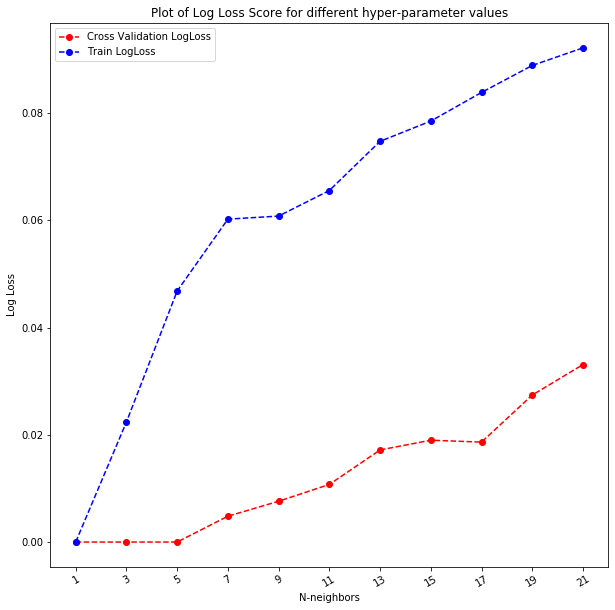

In [65]:
y_cv_ll = list(cv_log_loss_dict.values())
y_train_ll = list(train_log_loss_dict.values())

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(neighbors, y_cv_ll, marker='o', linestyle='--', color='r',label='Cross Validation LogLoss')
plt.plot(neighbors, y_train_ll,marker ='o',linestyle='--',color='b',label='Train LogLoss')

plt.xlabel('N-neighbors')
plt.ylabel('Log Loss')
plt.xticks(neighbors,neighbors,rotation=30)
plt.title('Plot of Log Loss Score for different hyper-parameter values')
plt.legend()
plt.show()

Differences in Log-Loss and AUC for both train and cross-validation data is very small.<br>
With increase in Neighbors the train and cross validation log-loss is increasing though the log-loss level is itself very small.<br>
Looking at both the plots, K=3 seems to be a reasonable value of K.

## RBF SVC
* Since we have already tried Logistic Regression with Elastic net regularization, we aren't using Linear SVC since expected results would be nevertheless same as that of logistic regression.
* Even with Kernels for SVC we are using rbf which is the default since we don't know of any dedicated kernel built to solve this problem.

In [66]:
from sklearn.svm import SVC

Cs = [10**i for i in range(-3,4,1)]
gammas = [10**i for i in range(-3,4,1)]

c_cv_auc_score = []
c_cv_log_loss = []

c_train_auc_score= []
c_train_log_loss = []

for c in Cs:
    gamma_cv_auc_score = []
    gamma_cv_log_loss = []
    
    gamma_train_auc_score= []
    gamma_train_log_loss = []
    for g in gammas:
    
        kernel_svc = SVC(C=c,kernel='rbf',gamma = g,probability=True)
        kernel_svc.fit(std_train_df,train_y)
        
        cv_pred = kernel_svc.predict(std_cv_df)
        cv_pred_prob = kernel_svc.predict_proba(std_cv_df)
    
        train_pred = kernel_svc.predict(std_train_df)
        train_pred_prob = kernel_svc.predict_proba(std_train_df)
    
        gamma_cv_auc_score.append(roc_auc_score(cv_y,cv_pred_prob[:,1]))
        gamma_cv_log_loss.append(log_loss(cv_y,cv_pred_prob[:,1]))
    
        gamma_train_auc_score.append(roc_auc_score(train_y,train_pred_prob[:,1]))
        gamma_train_log_loss.append(log_loss(train_y,train_pred_prob[:,1]))
        
        del(kernel_svc)
    
    c_cv_auc_score.append(gamma_cv_auc_score)
    c_cv_log_loss.append(gamma_cv_log_loss)
    
    c_train_auc_score.append(gamma_train_auc_score)
    c_train_log_loss.append(gamma_train_log_loss)

In [67]:
cv_auc_score = pd.DataFrame(c_cv_auc_score, index = Cs ,columns = gammas)
train_auc_score = pd.DataFrame(c_train_auc_score, index = Cs ,columns = gammas)

cv_log_loss = pd.DataFrame(c_cv_log_loss, index = Cs ,columns = gammas)
train_log_loss = pd.DataFrame(c_train_log_loss, index = Cs ,columns = gammas)

## Heatmaps to compare AUC and Logloss for train and Cross Validation data

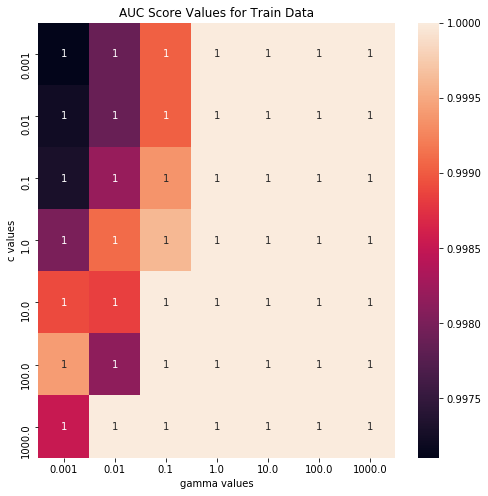

In [68]:
plt.figure(figsize = (8,8))
sns.heatmap(train_auc_score, annot=True)
plt.title('AUC Score Values for Train Data')
plt.xlabel('gamma values')
plt.ylabel('c values')
plt.show()

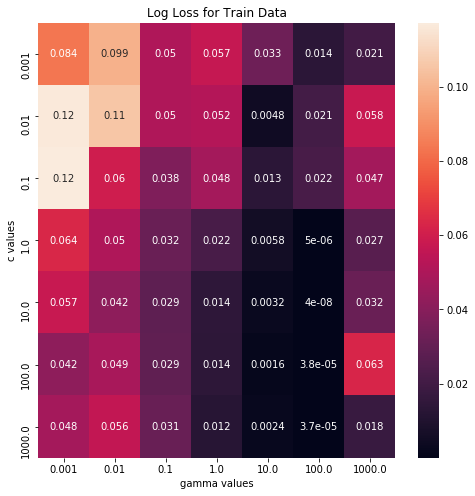

In [69]:
plt.figure(figsize = (8,8))
sns.heatmap(train_log_loss, annot=True)
plt.title('Log Loss for Train Data')
plt.xlabel('gamma values')
plt.ylabel('c values')
plt.show()

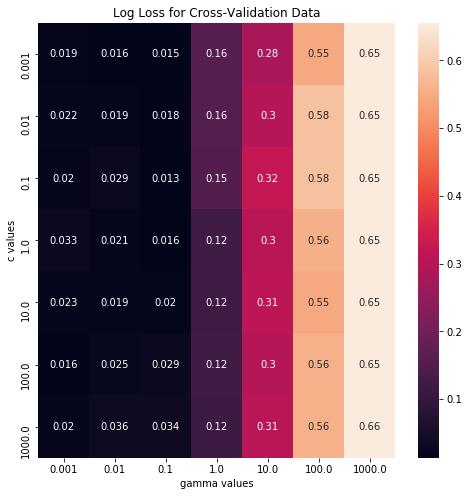

In [70]:
plt.figure(figsize = (8,8))
sns.heatmap(cv_log_loss, annot=True)
plt.title('Log Loss for Cross-Validation Data')
plt.xlabel('gamma values')
plt.ylabel('c values')
plt.show()

* AUC score for Train Data is same across all values of C's and so we are eliminating it for selection of Hyper-parameter.
* Rather we look at the logloss value to determine the right set of Hyper-parameter value.
* For training data with C>=1 and gamma >= 1 and gamma <=100 we see lower values of log-loss.
* While for cross-validation data with gamma>=0.001 and <=0.01 we see lower values of log-loss.
* A good fit model can be declared as one where training and cross-validation logloss are both low.
* One such region is a block with c=1 and gamma=100

## Decision Tree Classifier with hyper-parameter tuning

In [71]:
from sklearn.tree import DecisionTreeClassifier

train_auc_score_dict={}
cv_auc_score_dict={}

train_log_loss_dict={}
cv_log_loss_dict={}

#Hyper-parameter value
depths = [i for i in range(1,10,2)]

for depth in depths:
    decisionTreeClassifier = DecisionTreeClassifier(criterion = 'gini',splitter= 'best',max_depth = depth)
    decisionTreeClassifier.fit(std_train_df,train_y)
    
    cv_pred = decisionTreeClassifier.predict(std_cv_df)
    cv_pred_prob = decisionTreeClassifier.predict_proba(std_cv_df)
    
    train_pred = decisionTreeClassifier.predict(std_train_df)
    train_pred_prob = decisionTreeClassifier.predict_proba(std_train_df)
    
    cv_auc_score = roc_auc_score(cv_y,cv_pred_prob[:,1])
    cv_lloss = log_loss(cv_y,cv_pred_prob[:,1])
    
    train_auc_score = roc_auc_score(train_y,train_pred_prob[:,1])
    train_lloss = log_loss(train_y,train_pred_prob[:,1])
    
    cv_auc_score_dict[str(depth)] = cv_auc_score
    cv_log_loss_dict[str(depth)] = cv_lloss
    
    train_auc_score_dict[str(depth)] = train_auc_score
    train_log_loss_dict[str(depth)] = train_lloss

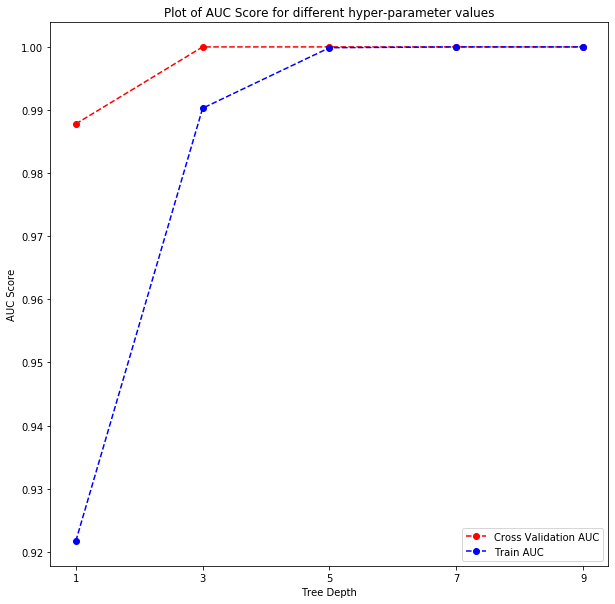

In [72]:
y_cv_auc = list(cv_auc_score_dict.values())
y_train_auc = list(train_auc_score_dict.values())
xi = [i for i in range(10)]

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(depths, y_cv_auc, marker='o', linestyle='--', color='r',label='Cross Validation AUC')
plt.plot(depths, y_train_auc,marker ='o',linestyle='--',color='b',label='Train AUC')

plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.xticks(depths,depths)
plt.title('Plot of AUC Score for different hyper-parameter values')
plt.legend()
plt.show()

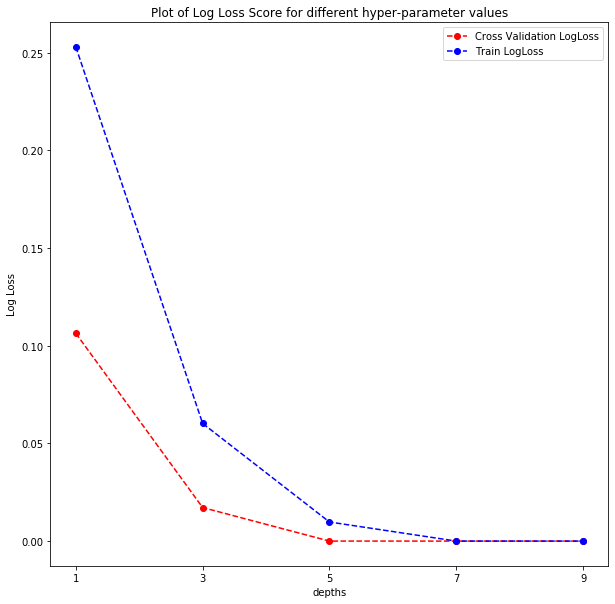

In [73]:
y_cv_ll = list(cv_log_loss_dict.values())
y_train_ll = list(train_log_loss_dict.values())

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(depths, y_cv_ll, marker='o', linestyle='--', color='r',label='Cross Validation LogLoss')
plt.plot(depths, y_train_ll,marker ='o',linestyle='--',color='b',label='Train LogLoss')

plt.xlabel('depths')
plt.ylabel('Log Loss')
plt.xticks(depths,depths)
plt.title('Plot of Log Loss Score for different hyper-parameter values')
plt.legend()
plt.show()

* For Decision Tree it can be clearly seen that they seem to perform well for depth of trees upto 5.

## Random Forest
* The size of the dataset is very small. 
* Therefore we will restrict the number of Decision Trees to be built to a small number of estimators.
* We won't hypertune depth of the tree since in random forest we want the individual models to overfit and also our dataset is small in size.

In [74]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [i for i in range(10,200,10)]
print("Hyper-parameter values : ",n_estimators_list)

train_auc_score_dict={}
cv_auc_score_dict={}

train_log_loss_dict={}
cv_log_loss_dict={}

for estimators in n_estimators_list:
    print("*****Training with",estimators,"estimators*****")
    randomForestClassifier = RandomForestClassifier(n_estimators = estimators)
    randomForestClassifier.fit(std_train_df,train_y)
    
    cv_pred = randomForestClassifier.predict(std_cv_df)
    cv_pred_prob = randomForestClassifier.predict_proba(std_cv_df)
    
    train_pred = randomForestClassifier.predict(std_train_df)
    train_pred_prob = randomForestClassifier.predict_proba(std_train_df)
    
    cv_auc_score = roc_auc_score(cv_y,cv_pred_prob[:,1])
    cv_lloss = log_loss(cv_y,cv_pred_prob[:,1])
    
    train_auc_score = roc_auc_score(train_y,train_pred_prob[:,1])
    train_lloss = log_loss(train_y,train_pred_prob[:,1])
    
    cv_auc_score_dict[str(estimators)] = cv_auc_score
    cv_log_loss_dict[str(estimators)] = cv_lloss
    
    train_auc_score_dict[str(estimators)] = train_auc_score
    train_log_loss_dict[str(estimators)] = train_lloss

Hyper-parameter values :  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
*****Training with 10 estimators*****
*****Training with 20 estimators*****
*****Training with 30 estimators*****
*****Training with 40 estimators*****
*****Training with 50 estimators*****
*****Training with 60 estimators*****
*****Training with 70 estimators*****
*****Training with 80 estimators*****
*****Training with 90 estimators*****
*****Training with 100 estimators*****
*****Training with 110 estimators*****
*****Training with 120 estimators*****
*****Training with 130 estimators*****
*****Training with 140 estimators*****
*****Training with 150 estimators*****
*****Training with 160 estimators*****
*****Training with 170 estimators*****
*****Training with 180 estimators*****
*****Training with 190 estimators*****


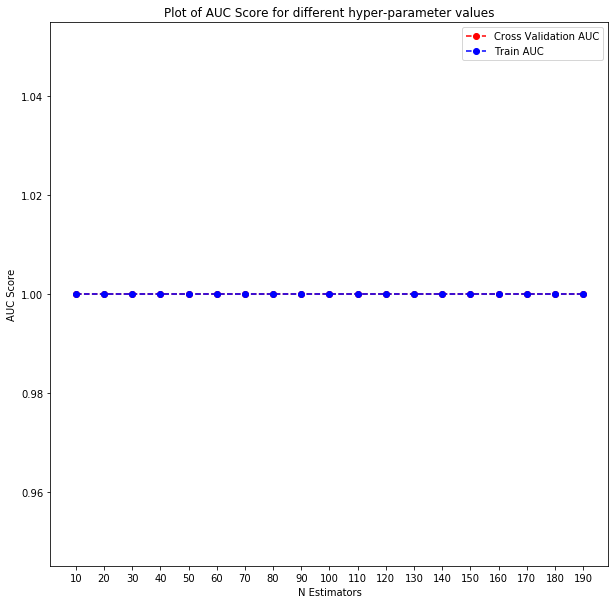

In [75]:
y_cv_auc = list(cv_auc_score_dict.values())
y_train_auc = list(train_auc_score_dict.values())
#xi = [i for i in range(10)]

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(n_estimators_list, y_cv_auc,marker='o', linestyle='--', color='r',label='Cross Validation AUC')
plt.plot(n_estimators_list, y_train_auc,marker='o',linestyle='--',color='b',label='Train AUC')

plt.xlabel('N Estimators')
plt.ylabel('AUC Score')
plt.xticks(n_estimators_list,n_estimators_list)
plt.title('Plot of AUC Score for different hyper-parameter values')
plt.legend()
plt.show()

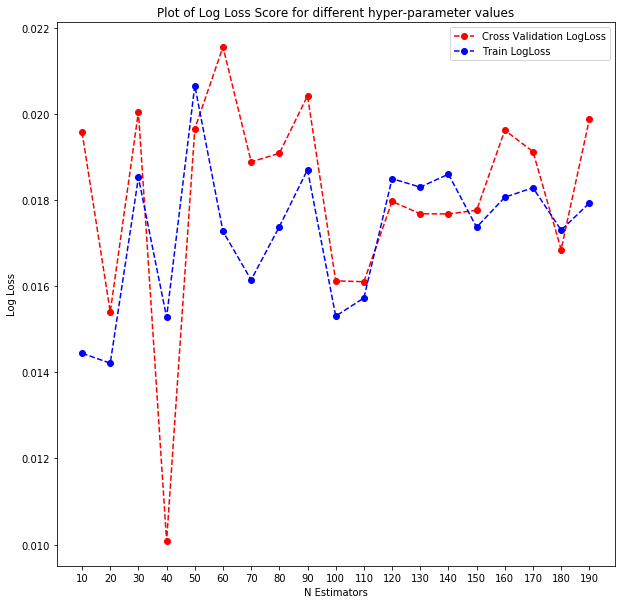

In [76]:
y_cv_ll = list(cv_log_loss_dict.values())
y_train_ll = list(train_log_loss_dict.values())

# plot the index for the x-values
plt.close()
plt.figure(figsize = (10,10))

plt.plot(n_estimators_list, y_cv_ll, marker='o', linestyle='--', color='r',label='Cross Validation LogLoss')
plt.plot(n_estimators_list, y_train_ll,marker ='o',linestyle='--',color='b',label='Train LogLoss')

plt.xlabel('N Estimators')
plt.ylabel('Log Loss')
plt.xticks(n_estimators_list,n_estimators_list)
plt.title('Plot of Log Loss Score for different hyper-parameter values')
plt.legend()
plt.show()

* The default value of n-estimators(100) shows same level of log-loss for both training and cv data.

* Now let's build models using best Hyper-parameters and check for different performance measures using test data.
* Check feature importances for each of the model and see how different are the feature importances.
* Once that is done, build a stacked model using all of the best models and check it's performance.

In [77]:
sampleFile = open('X_test','rb')
X_test = pickle.load(sampleFile)
sampleFile.close()

sampleFile = open('y_test','rb')
y_test = pickle.load(sampleFile)
sampleFile.close()

## Transformation of Test data into required format

In [78]:
test_df= pd.concat([X_test,y_test],axis=1)
test_df['target'] = test_df['classification'].apply(lambda x : 1 if x == 'ckd' else 0)

trans_test_df = transformCvAndTest(test_df)

test_x = trans_test_df.drop(['target'],axis=1)
test_y = trans_test_df['target']

#temp fix
test_x.drop(['bp_bins'],axis = 1,inplace = True)

std_test_x = scaler.transform(test_x)
std_test_df = pd.DataFrame(std_test_x,columns = test_x.columns)

## Building models using best hyper-parameters and testing against test data

In [79]:
# Logistic Classifier with l1-ratio for elastic net = 1.0
logClf = LogisticRegression(solver = 'saga',penalty = 'elasticnet',l1_ratio = 1.0,max_iter = 1000)
logClf.fit(std_train_df,train_y)

# KNN model with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(std_train_df,train_y)

#Kernel SVC with C=1 and gamma = 100
kernel_svc = SVC(C=1,kernel='rbf',gamma = 100,probability=True)
kernel_svc.fit(std_train_df,train_y)

#DecisionTreeClassifier with depth of the tree=5
decisionTreeClassifier = DecisionTreeClassifier(criterion = 'gini',splitter= 'best',max_depth = 5)
decisionTreeClassifier.fit(std_train_df,train_y)

#RandomForestClassifier with number of estimators = 100
randomForestClassifier = RandomForestClassifier(n_estimators = 100)
randomForestClassifier.fit(std_train_df,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
test_y.value_counts()

1    52
0    28
Name: target, dtype: int64

In [81]:
## Function to generate test results
def generateTestResults(test_y,test_pred,test_pred_pob):
    test_result = []
    
    test_auc_score = roc_auc_score(test_y,test_pred_prob[:,1])
    test_lloss = log_loss(test_y,test_pred_prob[:,1])
    pr,re,f1,su = precision_recall_fscore_support(test_y,test_pred)
    
    test_result.append(test_auc_score)
    test_result.append(test_lloss)
    test_result.append(pr[0])
    test_result.append(pr[1])
    test_result.append(re[0])
    test_result.append(re[1])
    test_result.append(f1[0])
    test_result.append(f1[1])
    return test_result

In [82]:
classifiers = [logClf,neigh,kernel_svc,decisionTreeClassifier,randomForestClassifier]
test_results = []
for classifier in classifiers:
    print("Classifier : ",classifier)
    test_pred = classifier.predict(std_test_df)
    test_pred_prob = classifier.predict_proba(std_test_df)
    test_results.append(generateTestResults(test_y,test_pred,test_pred_prob))

Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1.0, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
Classifier :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Classifier :  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Classifier :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_imp

## Stacking Classifiers to build a powerful model

In [83]:
estimators = [
	 ('logClf',LogisticRegression(solver = 'saga',penalty = 'elasticnet',l1_ratio = 1.0,max_iter = 1000)),
	 ('knnClf',KNeighborsClassifier(n_neighbors=3)),
	 ('dtClf',DecisionTreeClassifier(criterion = 'gini',splitter= 'best',max_depth = 5)),
	 ('randomClf',RandomForestClassifier(n_estimators = 100))
	]
	
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(std_train_df,train_y)

StackingClassifier(cv=None,
                   estimators=[('logClf',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=1.0, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None,
                                                   penalty='elasticnet',
                                                   random_state=None,
                                                   solver='saga', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knnClf',
                                KNei

In [84]:
test_pred = clf.predict(std_test_df)
test_pred_prob = clf.predict_proba(std_test_df)
test_results.append(generateTestResults(test_y,test_pred,test_pred_prob))

In [85]:
test_res_df = pd.DataFrame(test_results,columns = ['auc_score','log_loss','precision-0','precision-1','recall-0','recall-1','f1-score-0','f1-score-1'],
                            index=['Logistic','KNN','RBF-SVC','DecisionTree','RandomForest','StackedClassifier'])
test_res_df

,auc_score,log_loss,precision-0,precision-1,recall-0,recall-1,f1-score-0,f1-score-1
Logistic,1.000000,0.063457,0.933333,1.000000,1.00,0.961538,0.965517,0.980392
KNN,0.980769,0.868538,0.933333,1.000000,1.00,0.961538,0.965517,0.980392
RBF-SVC,0.984890,0.434679,1.000000,0.712329,0.25,1.000000,0.400000,0.832000
DecisionTree,0.980769,0.863469,0.933333,1.000000,1.00,0.961538,0.965517,0.980392
RandomForest,1.000000,0.052073,0.965517,1.000000,1.00,0.980769,0.982456,0.990291
StackedClassifier,1.000000,0.065721,0.933333,1.000000,1.00,0.961538,0.965517,0.980392


## Feature Importances

No handles with labels found to put in legend.


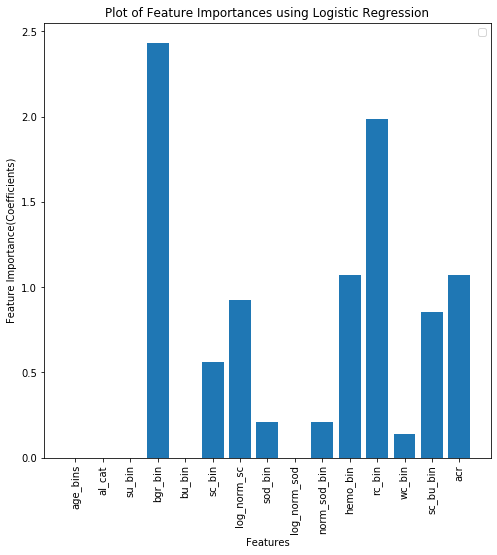

In [86]:
plt.close()
plt.figure(figsize = (8,8))

features = std_train_df.columns
plt.bar(features,abs(logClf.coef_[0]))

plt.xlabel('Features')
plt.ylabel('Feature Importance(Coefficients)')
plt.xticks(features,features,rotation=90)
plt.title('Plot of Feature Importances using Logistic Regression')
plt.legend()
plt.show()

No handles with labels found to put in legend.


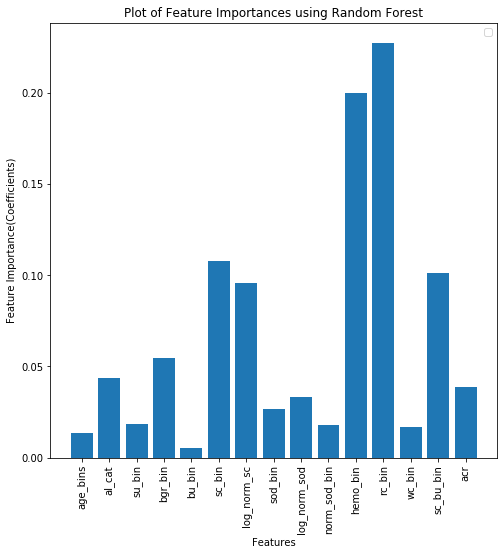

In [87]:
plt.close()
plt.figure(figsize = (8,8))

plt.bar(features,randomForestClassifier.feature_importances_)

plt.xlabel('Features')
plt.ylabel('Feature Importance(Coefficients)')
plt.xticks(features,features,rotation=90)
plt.title('Plot of Feature Importances using Random Forest')
plt.legend()
plt.show()

## Saving all the classifiers
* Saving all the classifiers so that they can be later used for building the app

In [88]:
## logClf,neigh,kernel_svc,decisionTreeClassifier,randomForestClassifier
sampleFile = open('logClf','wb')
pickle.dump(logClf,sampleFile)
sampleFile.close()

sampleFile = open('neigh','wb')
pickle.dump(neigh,sampleFile)
sampleFile.close()

sampleFile = open('kernel_svc','wb')
pickle.dump(kernel_svc,sampleFile)
sampleFile.close()

sampleFile = open('decisionTreeClassifier','wb')
pickle.dump(decisionTreeClassifier,sampleFile)
sampleFile.close()

sampleFile = open('randomForestClassifier','wb')
pickle.dump(randomForestClassifier,sampleFile)
sampleFile.close()

sampleFile = open('stackedClassifier','wb')
pickle.dump(clf,sampleFile)
sampleFile.close()
